In [19]:

import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

In [20]:
public_complaints = pd.read_csv('../data/Total_Public_Complaints_ASR_PCF_TBL_001.csv', index_col=0)
public_complaints.head(20)

,Year,Type,Subtype,Count_,ObjectId
Index_,,,,,
1,2019,Investigated Complaints,Conduct - Less Serious,245,1
2,2019,Investigated Complaints,Conduct - Serious,17,2
3,2019,Investigated Complaints,Policy,2,3
4,2019,Investigated Complaints,Service,24,4
5,2019,Not Investigated Complaints,Better dealt in Other Law,34,5
6,2019,Not Investigated Complaints,Complaint Over Six Months,4,6
7,2019,Not Investigated Complaints,Frivolous,84,7
8,2019,Not Investigated Complaints,Made In Bad Faith,0,8
9,2019,Not Investigated Complaints,No Jurisdiction,30,9


In [21]:
adf=public_complaints[['Subtype','Count_']]
adf.head()

,Subtype,Count_
Index_,,
1,Conduct - Less Serious,245
2,Conduct - Serious,17
3,Policy,2
4,Service,24
5,Better dealt in Other Law,34


In [22]:
adf.describe()

,Count_
count,78.000000
mean,48.076923
std,74.303479
min,0.000000
25%,2.000000
50%,18.000000
75%,48.250000
max,300.000000


# Split subsets

In [23]:

Serious_complaints = adf[adf['Subtype'] == 'Conduct - Serious']['Count_']
Other_law= adf[adf['Subtype'] == 'Better dealt in Other Law']['Count_']
Service = adf[adf['Subtype'] == 'Service']['Count_']


In [24]:
Service

Index_
4     24
17    18
30    24
43    31
56    18
69    25
Name: Count_, dtype: int64

## The Violin Box Plot

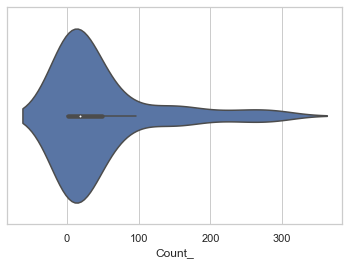

In [25]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.violinplot(x=adf["Count_"])

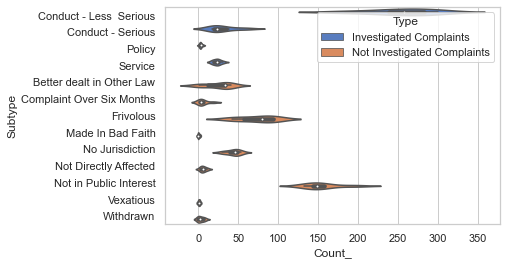

In [26]:
ax = sns.violinplot(x="Count_", y="Subtype", hue="Type",
                    data=public_complaints, palette="muted",  scale="width")

## 1-way Anova Model
Now, we will build a model and run ANOVA using statsmodels ols() and anova_lm() methods. Columns Count and Subtype (i.e. what subtype of allegation was made) contain independent (predictor) and dependent (response) variable values, correspondingly.

In [28]:
#!pip install scikit_posthocs
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [29]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('Count_ ~ C(Subtype)', data=adf).fit()


In [30]:
# print summary of linear regression
(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Count_   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     126.1
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           3.67e-40
Time:                        22:54:31   Log-Likelihood:                -321.83
No. Observations:                  78   AIC:                             669.7
Df Residuals:                      65   BIC:                             700.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  24.8333      6.701      3.706      0.000      11.450      38.217
C(Subtype)[T.Complaint Over Six Months]   -18.8333      9.477     -1.987      0.051     -37.760       0.094
C(Subtype)[T.Conduct - Less  Serious]     228.8333      9.477     24.146      0.000     209.906     247.760
C(Subtype)[T.Conduct - Serious]             5.5000      9.477      0.580      0.564     -13.427      24.427
C(Subtype)[T.Frivolous]                    49.1667      9.477      5.188      0.000      30.240      68.094
C(Subtype)[T.Made In Bad Faith]           -24.1667      9.477     -2.550      0.013     -43.094      -5.240
C(Subtype)[T.No Jurisdiction]              18.8333      9.477      1.987      0.051      -0.094      37.760
C(Subtype)[T.Not Directly Affected]       -18.6667      9.477     -1.970      0.053     -37.594       0.260
C(Subtype)[T.Not in Public Interest]      130.3333      9.477     13.752      0.000     111.406     149.260
C(Subtype)[T.Policy]                      -21.8333      9.477     -2.304      0.024     -40.760      -2.906
C(Subtype)[T.Service]                      -1.5000      9.477     -0.158      0.875     -20.427      17.427
C(Subtype)[T.Vexatious]                   -23.8333      9.477     -2.515      0.014     -42.760      -4.906
C(Subtype)[T.Withdrawn]                   -21.6667      9.477     -2.286      0.026     -40.594      -2.740
==============================================================================
Omnibus:                       24.059   Durbin-Watson:                   2.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.331
Skew:                          -0.607   Prob(JB):                     1.36e-28
Kurtosis:                       9.165   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Let's look at the Anova table

In [31]:
#Show Anova table
anova_table = sa.stats.anova_lm(lm)
print(anova_table)

              df         sum_sq       mean_sq          F        PR(>F)
C(Subtype)  12.0  407603.538462  33966.961538  126.06215  3.674095e-40
Residual    65.0   17514.000000    269.446154        NaN           NaN


The results tell us that there is a significant difference between groups means (p = 3.67e-40), but does not tell us the exact group pairs which are different in means. To obtain pairwise group differences, we will carry out a posteriori (post hoc) analysis using scikits-posthocs package. 

##### Conduct a Post Hoc test in Anova

In [32]:
sp.posthoc_ttest(adf, val_col='Count_', group_col='Subtype', p_adjust='holm')

,Conduct - Less Serious,Conduct - Serious,Policy,Service,Better dealt in Other Law,Complaint Over Six Months,Frivolous,Made In Bad Faith,No Jurisdiction,Not Directly Affected,Not in Public Interest,Vexatious,Withdrawn
Conduct - Less Serious,1.000000,0.000016,3.010858e-06,0.000007,0.000013,0.000004,0.000164,2.819948e-06,0.000017,0.000003,1.743051e-02,2.819948e-06,0.000003
Conduct - Serious,0.000016,1.000000,7.486443e-02,1.000000,1.000000,0.175667,0.105883,4.635905e-02,1.000000,0.157048,3.580919e-05,4.849208e-02,0.086387
Policy,0.000003,0.074864,1.000000e+00,0.000113,0.233954,1.000000,0.000853,3.131168e-01,0.000030,1.000000,9.920303e-07,4.918126e-01,1.000000
Service,0.000007,1.000000,1.127999e-04,1.000000,1.000000,0.017034,0.013548,3.339391e-05,0.019421,0.001661,4.172437e-06,3.580919e-05,0.000585
Better dealt in Other Law,0.000013,1.000000,2.339539e-01,1.000000,1.000000,0.494896,0.056966,1.570478e-01,0.563369,0.458507,2.789371e-05,1.589957e-01,0.259312
Complaint Over Six Months,0.000004,0.175667,1.000000e+00,0.017034,0.494896,1.000000,0.001596,1.000000e+00,0.000370,1.000000,1.700894e-06,1.000000e+00,1.000000
Frivolous,0.000164,0.105883,8.525310e-04,0.013548,0.056966,0.001596,1.000000,6.630700e-04,0.264557,0.001307,4.004978e-03,6.737378e-04,0.000936
Made In Bad Faith,0.000003,0.046359,3.131168e-01,0.000033,0.157048,1.000000,0.000663,1.000000e+00,0.000017,0.141452,8.640666e-07,1.000000e+00,1.000000
No Jurisdiction,0.000017,1.000000,3.023625e-05,0.019421,0.563369,0.000370,0.264557,1.741126e-05,1.000000,0.000102,2.789371e-05,1.798370e-05,0.000056
Not Directly Affected,0.000003,0.157048,1.000000e+00,0.001661,0.458507,1.000000,0.001307,1.414519e-01,0.000102,1.000000,1.303898e-06,1.661998e-01,1.000000


Remember to use a FWER controlling procedure, such as Holm procedure, when making multiple comparisons. As seen from this table, significant differences in group means are obtained for all group pairs (i.e. from each allegation subtype from the 'subtype' column).